# Permanental Point process

In [1]:
using Statistics, LinearAlgebra, Distributions, Plots

In [2]:
# try kenel
KerB(n, x, y) = sum([(x*y)^j for j = 0:n])

KerB (generic function with 1 method)

In [3]:
x_span = -.995:0.005:.995
n = 500
K = [KerB(n, x, y) for x in x_span, y in x_span] * (x_span[2] - x_span[1]) / π # correct normalization
Λ, Q = eigen(K)
Λ[Λ .>= 1.0] .= 1.0
Λ[Λ .<= 1e-9] .= 0.0
sum(Λ)

2.0883688482436

In [4]:
function randPPP(Λ, Q)
    n = length(Λ)
    α = (randn(n) + im*randn(n)) .* .√(Λ / 2)
    β = Q * α
    number = rand.(Poisson.((abs.(β)).^2))
    set = []
    for i in 1:n
        if number[i] != 0
            append!(set, [i for j in 1:number[i]])
        end
    end
    return sort(set)
end

randPPP (generic function with 1 method)

In [5]:
randPPP(Λ, Q)

2-element Vector{Any}:
  30
 371

In [6]:
try_PPP = []
for i in 1:10000
    append!(try_PPP,randPPP(Λ, Q)) # use append!, otherwise cannot finish loop
end

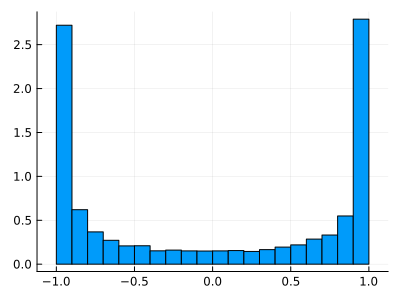

In [8]:
histogram(x_span[try_PPP], size = (400,300) ,normalize=:pdf, label=false, bins = 20)

In [9]:
savefig("../figures/test-21.pdf")

"/Users/liuyizhou/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/MIT/MIT 2nd y fall/18.338/figures/test-21.pdf"